In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import k_means
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
crime=pd.read_csv("crime_data (1).csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime = crime.rename({'Unnamed: 0':'State'}, axis = 1)
crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime.isnull().sum()


State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# Hierachial clustering (or) Agglomerative Clustering


In [7]:
# Normalizing Dataset

scaler = MinMaxScaler()

crime_scaler = scaler.fit_transform(crime.iloc[:,1:])
crime_scaler

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

<IPython.core.display.Javascript object>

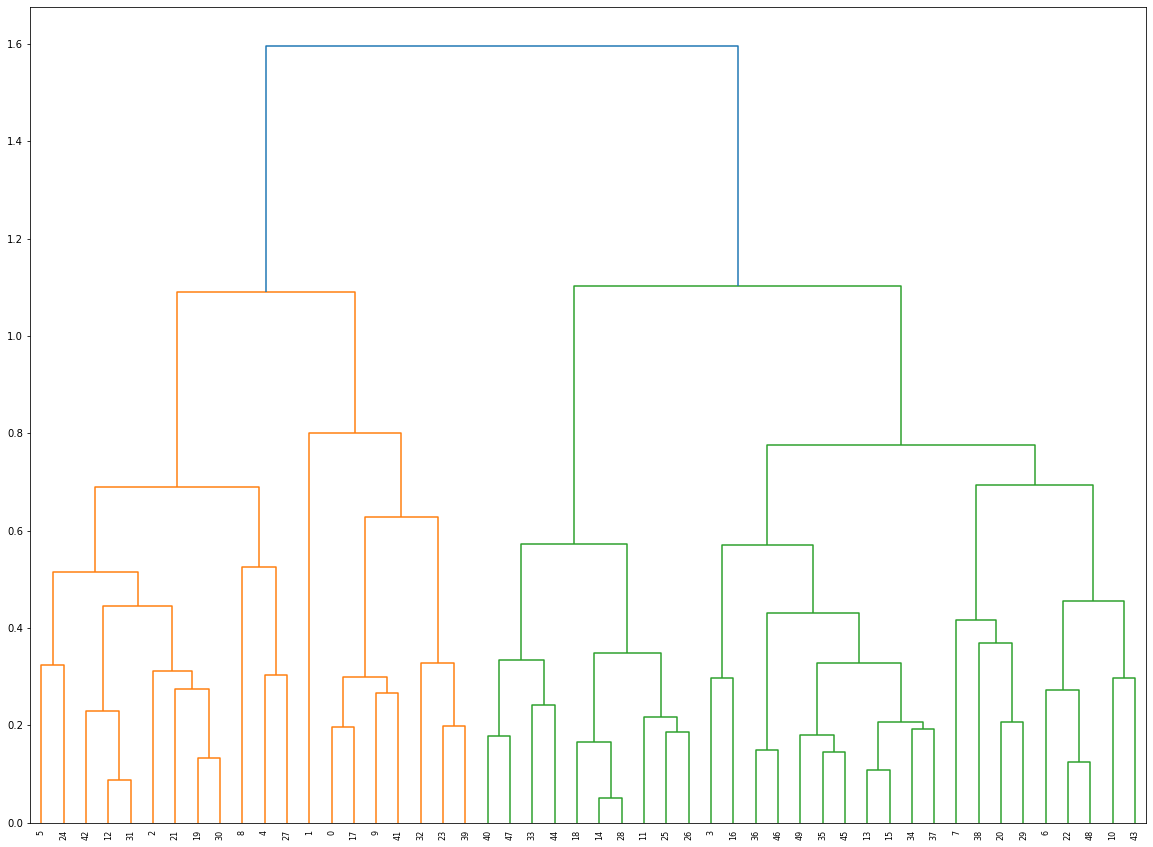

In [8]:
# create dendrogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20, 15))  
dendograms=sch.dendrogram(sch.linkage(crime_scaler,'complete'))

In [9]:
model=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="complete")
cluster_numbers=model.fit_predict(crime_scaler)
cluster_numbers

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
cluster_numbers

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
# silhouette score
sil_score= silhouette_score(crime_scaler, model.labels_)
print('silhouette score: ',sil_score)

silhouette score:  0.42364457559625074


# K_means clustering

In [12]:
model1=KMeans(n_clusters=3)
cluster_numbers=model1.fit_predict(crime_scaler)

<IPython.core.display.Javascript object>

In [13]:
crime1 = crime.copy()
crime1['Cluster_tag']=cluster_numbers

In [14]:
crime1['Cluster_tag'].value_counts()

0    19
1    18
2    13
Name: Cluster_tag, dtype: int64

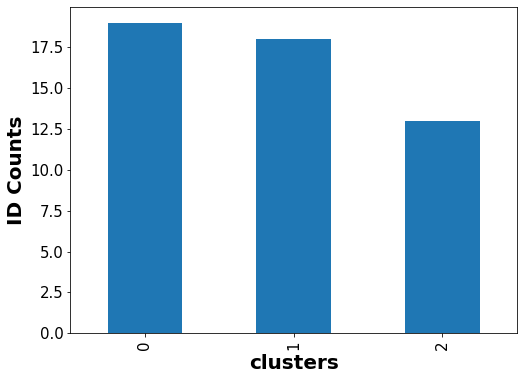

In [15]:
import matplotlib.pyplot as plt

crime1['Cluster_tag'].value_counts().plot(kind='bar',figsize = (8,6))
plt.xlabel("clusters",loc="center",fontsize= 20,fontweight= "bold")
plt.ylabel("ID Counts",loc="center",fontsize=20,fontweight= "bold")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


# Elbow method for KMeans to get optimal clusters

In [16]:
nc=range(2,10)
l=[]
for i in nc:
    model=KMeans(i)
    cluster_numbers=model.fit_predict(crime_scaler)     
    l.append(model.inertia_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

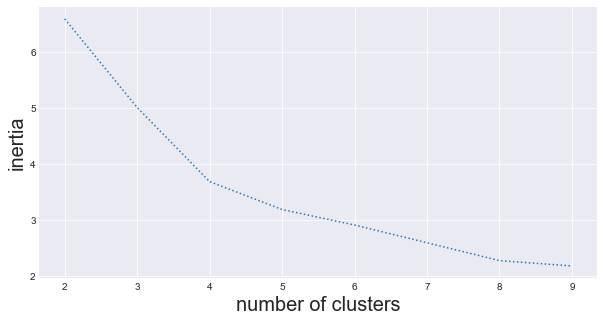

In [17]:
plt.figure(figsize=(10,5))
plt.style.use("seaborn-darkgrid")
plt.plot(nc,l,linestyle=":")
plt.xlabel("number of clusters",size=20)
plt.ylabel("inertia",size=20)
plt.show()

In [18]:
# As per looking at the above elbow graph, we can consider either 4 as the optimal clusters.
model1=KMeans(n_clusters=4)
cluster_numbers=model1.fit_predict(crime_scaler)

<IPython.core.display.Javascript object>

In [19]:
sil_score= silhouette_score(crime_scaler, model1.labels_)
print('silhouette score: ',sil_score)

silhouette score:  0.34089035600743633


# DB Scan

In [20]:
model2 = DBSCAN(eps=0.4, min_samples=5)
model2.fit(crime_scaler)

DBSCAN(eps=0.4)

In [21]:
crime2 = crime.copy()
crime2=pd.DataFrame(model2.fit_predict(crime_scaler),columns=['clusterid_DBSCAN'])
crime2['clusterid_DBSCAN'].value_counts()

 0    49
-1     1
Name: clusterid_DBSCAN, dtype: int64

In [22]:
sil_score= silhouette_score(crime_scaler, model2.labels_)
print('silhouette score: ',sil_score)

silhouette score:  0.21033337025958487


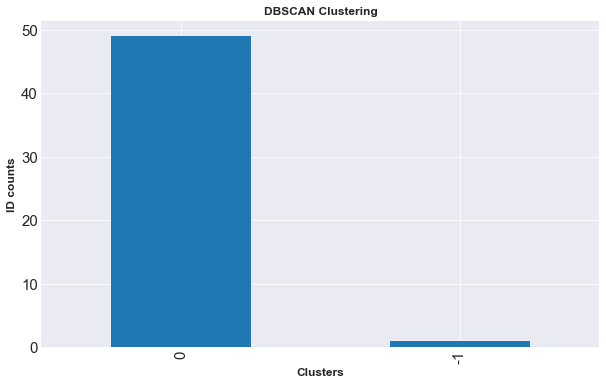

In [23]:

fig, ax = plt.subplots(figsize=(10, 6))
crime2['clusterid_DBSCAN'].value_counts().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


# As more than 50% of data is in one cluster, we will try for lower value of epsilon

In [24]:
# for epsilon = 0.3
model2 = DBSCAN(eps=0.3, min_samples=5)
model2.fit(crime_scaler)

crime2=pd.DataFrame(model2.fit_predict(crime_scaler),columns=['clusterid_DBSCAN'])
print(crime2['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(crime_scaler, model2.labels_)
print('silhouette score: ',sil_score)

 1    31
-1    14
 0     5
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.28111691272255107


In [25]:
# for epsilon = 0.2
model2 = DBSCAN(eps=0.2, min_samples=5)
model2.fit(crime_scaler)

crime2=pd.DataFrame(model2.fit_predict(crime_scaler),columns=['clusterid_DBSCAN'])
print(crime2['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(crime_scaler, model.labels_)
print('silhouette score: ',sil_score)

-1    33
 0    11
 1     6
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.26313779589594316


# for epsilon=0.3,sihouette score is higher than  silhouette score of epsilon =0.4,0.2 so we can have 3 cluseters